# **Foundations of Data Science Fall 2022 - Homework 1 (32 points)**

### Student Name: Stuti Mishra
### Student Net Id: sm11538

---



### **Part 0: Data Exploration and Linear Regression (5 Points)**

---


Background: This problem focuses on an ECG dataset that contains voltage measurements from a number of points on the scalp. A common task is to estimate which parts of the brain caused the measured response, which can help identify which parts of the brain are involved in specific tasks. However, the number of possible locations in the brain is much larger than the number of measurements, which makes this an appropriate task to assess the use of regularization to determine the brain region that is active under stimulus.


In [ ]:
# Importing all important packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Downloading data

fn_src ='https://drive.google.com/uc?export=download&id=1RzQpKONOcXSMxH2ZzOI4iVMiTgD6ttSl'
fn_dst ='eeg_dat.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:
    print('Fetching file %s [53MB].  This may take a minute..' % fn_dst)
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File eeg_dat.p is already downloaded


In [ ]:
# Loading data

import pickle
fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X,Y] = pickle.load(fp)

>>**1**\. **(1 Point)** *Display the first 5 rows of X and Y and print the dimensions for both datasets*



In [ ]:
print("First 5 rows of X:")
print(X[:5])

# Display the dimensions of X
print("Dimensions of X:", X.shape)

# Display the first 5 rows of Y
print("\nFirst 5 rows of Y:")
print(Y[:5])

# Display the dimensions of Y
print("Dimensions of Y:", Y.shape)

First 5 rows of X:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00529827  0.00491268  0.00598048 ...  0.00162549 -0.0023215
   0.00115952]
 [-0.01522969  0.00059051 -0.00191475 ...  0.00331738 -0.00214887
   0.00160143]]
Dimensions of X: (305, 22494)

First 5 rows of Y:
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.     


Note that there are three key variables:
* `nt`    = number of time steps that we measure data
* `nchan` = number of channels (i.e. electrodes) measured in each time step
* `ncur`  = number of currents in the brain that we want to estimate.  

Each current comes from one brain region (called a *voxel*) in either the `x`, `y` or `z` direction.  So,

    nvoxels = ncur / 3
    
The components of the `X` and `Y` matrices are:
*  `Y[i,k]` = electric field measurement on channel `i` at time `k`
*  `X[i,j]` = sensitivity of channel `i` to current `j`.



>>**2**\. **(1 Point)** Split the data into training and testing. What split do you use, and why?

>> The number of records are relatively less hence using a 70-30 split because it allows having enough data to train the model effectively and having enough data to evaluate its performance accurately.
It allows enough data to avoid underfitting (more training data than 60-40 split) and a larger testing set leading to a more reliable evaluation of the model's performance (more testing data than 80-20 split). Hence, 70-30 seems like a reasonable tradeoff.

---



---



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the dimensions of the resulting sets
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of Y_train:", Y_train.shape)
print("Dimensions of Y_test:", Y_test.shape)


Dimensions of X_train: (213, 22494)
Dimensions of X_test: (92, 22494)
Dimensions of Y_train: (213, 85)
Dimensions of Y_test: (92, 85)


>>**3**\. **(3 Points)** Perform linear regression. As a reminder, the optimization for linear regression using ordinary least squares is written below, the data consists of $n$ observations {$x_i$,$y_i$}. Each observation $i$ includes a scalar response $y_i$ and a column vector $x_i$ of $p$ variables (regressors).

>>The evaluation metric used for linear regression is the $R^2$ score. Explain what $R^2$ tells us, and interpret your results based on this.*



\begin{align}
\text{Ordinary Least Squares}
\end{align}



 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - β_o - \sum_{j=1}^p β_jx_{ij}  \right)^2  \right]
    \end{align}



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, Y_train)

# Predicting  on the test data
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.36566837924686973
R-squared: -5.604769832451017


>> R-squared value of -5.604769832451017 is below 0, which is highly unusual and suggests that the model is performing very poorly and not fitting the data.
Reasons for such low R squared value can be data quality, worse feature engineering . It suggests that the linear regression is not an appropriate model.   

We can visualize this using a graph as well.

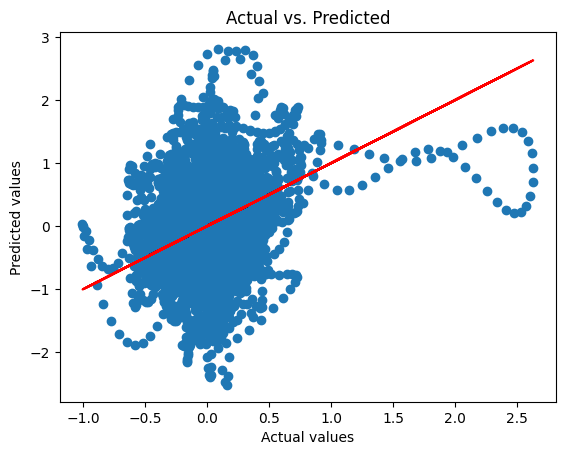

In [ ]:


# Create a scatter plot of predicted vs. actual values
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title(f"Actual vs. Predicted")

# Plot a diagonal line (y = x) to represent perfect predictions
plt.plot(Y_test, Y_test, linestyle='--', color='red')
plt.show()

### **Part 1: Ridge Regularization (10 Points)**

---


>>**1**\. **(1 Point)** *Now we will use ridge regression, a model tuning method that can be used on data that suffers from multicollinearity. Notice the regularization term added to the optimization below, which uses the squared value of $β$. It is also known as L2 regularization. Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. First, what is the degree of collinearity in the data? Show your work and give rationale for the degree of collinearity.*


\begin{align}
\text{Ridge Regression}
\end{align}


 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - βo - \sum_{j=1}^p β_jx_{ij}  \right)^2 + λ\sum_{j=1}^p|β_j|^2  \right]
    \end{align}


In [ ]:


# Calculate the correlation matrix
corr_matrix = np.corrcoef(X, rowvar=False)

# Print the correlation matrix
print("Correlation matrix:")
print(corr_matrix)

# Calculate the degree of collinearity (average pairwise correlation)
average_correlation = np.mean(corr_matrix)
print("Average pairwise correlation:", average_correlation)


# Assume you have a correlation matrix, corr_matrix
# Replace this with your actual correlation matrix
# corr_matrix = ...
import numpy as np

# Assume you have a correlation matrix, corr_matrix
# Replace this with your actual correlation matrix
# corr_matrix = ...

# Define a correlation threshold (e.g., 0.8 for a high correlation)
correlation_threshold = 0.8

# Get the shape of the correlation matrix
num_features = corr_matrix.shape[0]

# Traverse the correlation matrix and identify highly correlated pairs
count =0
total_pair=0
for i in range(num_features):
    for j in range(i + 1, num_features):  # Avoid duplicate pairs and the diagonal
        total_pair=total_pair+1
        correlation = corr_matrix[i, j]
        if abs(correlation) > correlation_threshold:
            count=count+1

            #highly_correlated_pairs.append((i, j, correlation))
print("Highly correlated pairs :", count)
print("Total number pairs:", total_pair)
print("Ratio for correlated to total pairs", count/total_pair)


Correlation matrix:
[[ 1.00000000e+00 -1.20605536e-01  2.46089091e-02 ... -1.24526025e-02
   9.99641812e-03 -6.87705158e-04]
 [-1.20605536e-01  1.00000000e+00  9.87927891e-01 ... -7.54773972e-04
   1.12697803e-02 -1.68804225e-02]
 [ 2.46089091e-02  9.87927891e-01  1.00000000e+00 ... -3.81560714e-03
   1.14015760e-02 -1.49274099e-02]
 ...
 [-1.24526025e-02 -7.54773972e-04 -3.81560714e-03 ...  1.00000000e+00
  -8.77202829e-01 -2.65394583e-01]
 [ 9.99641812e-03  1.12697803e-02  1.14015760e-02 ... -8.77202829e-01
   1.00000000e+00 -2.15415664e-01]
 [-6.87705158e-04 -1.68804225e-02 -1.49274099e-02 ... -2.65394583e-01
  -2.15415664e-01  1.00000000e+00]]
Average pairwise correlation: 0.006595909879295234
Highly correlated pairs : 1418684
Total number pairs: 252978771
Ratio for correlated to total pairs 0.005607917195549978


>> The ratio shows that there is 0.56% of the pairs are highly correlated suggests that there is a relatively low degree of correlation among the pairs of variables.
This could also mean dataset doesn't suffer from strong multicollinearity.






>>**1b**\. **(2 Points)** *Now implement ridge regression using sklearn. Start with the default alpha value, and print the $R^2$ score*

In [ ]:
# Write your code here
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Create a Ridge regression model with default alpha
ridge_model = Ridge()

# Fit the model on the training data
ridge_model.fit(X_train, Y_train)

# Predict on the test data
Y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared for Ridge Regression
r2_ridge = r2_score(Y_test, Y_pred_ridge)

# Print the R-squared for Ridge Regression
print("R-squared (Ridge):", r2_ridge)



R-squared (Ridge): 0.1758544493420293


>>**2**\. **(5 Points)** *Now we will look at what happens when varying the parameter. Try 10 different values for alpha and print the alpha value with corresponding $R^2$ score using Cross-Validation for training data. Describe how you pick the range of alpha values to examine.*



>>

*   For a suitable range of alpha values, using a logarithmic scale to explore a wide range of possibilities, from very small values to relatively large ones. (gradually increasing)
* We using np.logspace(-3, 3, 10) to generate 10 alpha values evenly distributed on a logarithmic scale  
* Alpha value is a hyperparamater that controls regularization strength, dealing with complexity and trade-offs between fitting and keeping the model simple



In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Define a range of alpha values (logarithmically spaced)
alpha_values = np.logspace(-3, 3, 10)

# Dictionary to store alpha and corresponding R-squared scores
alpha_r2_scores = {}

# Iterate through alpha values and calculate R-squared using cross-validation
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    # Perform cross-validation and calculate R-squared scores
    r2_scores = cross_val_score(ridge_model, X_train, Y_train, cv=5)
    # Store the mean R-squared score for this alpha
    alpha_r2_scores[alpha] = np.mean(r2_scores)

# Print alpha values with corresponding R-squared scores
print("Alpha\t\tR-squared")
for alpha, r2_score in alpha_r2_scores.items():
    print(f"{alpha:.6f}\t{r2_score:.6f}")


Alpha		R-squared
0.001000	-1.959449
0.004642	-1.024188
0.021544	-0.371937
0.100000	-0.006694
0.464159	0.093875
2.154435	0.055466
10.000000	0.016876
46.415888	-0.008497
215.443469	-0.019152
1000.000000	-0.022006


>>**3**\. **(2 Points)** What is the highest $R^2$ you can achieve?

In [ ]:

# Find the alpha with the highest R-squared score
best_alpha = max(alpha_r2_scores, key=alpha_r2_scores.get)
highest_r2_score = alpha_r2_scores[best_alpha]

# Print the highest R-squared score and corresponding alpha
print("Highest R-squared:", highest_r2_score)
print("Corresponding Alpha:", best_alpha)


Highest R-squared: 0.09387532704932867
Corresponding Alpha: 0.46415888336127775


Plotting a graph for various alphas and corresponding R squared values

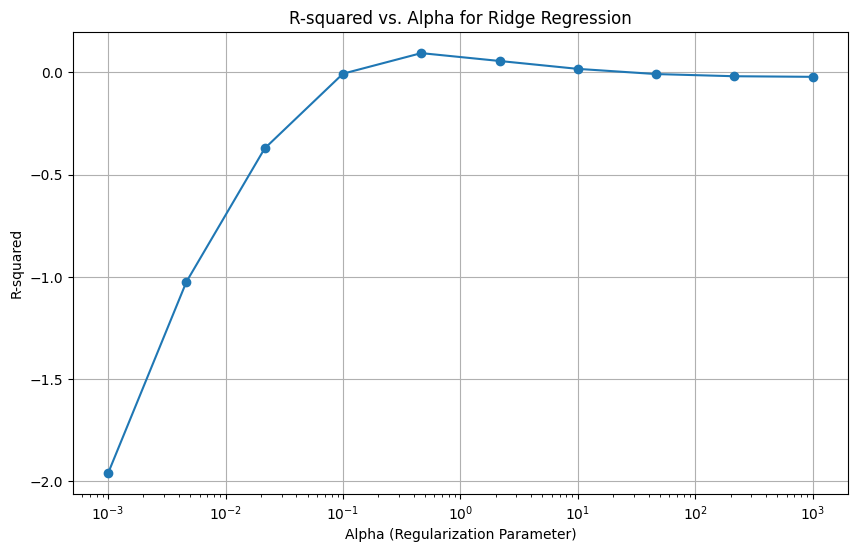

In [ ]:
alphas = list(alpha_r2_scores.keys())
r2_scores = list(alpha_r2_scores.values())

# Plot the R-squared scores against alpha values
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, r2_scores, marker='o')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('R-squared vs. Alpha for Ridge Regression')
plt.grid(True)
plt.show()

### **Part 2: Lasso Regularization (12 Points)**

---


>>**1**\. **(3 Points)** *Another method often used to improve performance is Lasso regularization. Lasso regression improves performance by using shrinkage, where data values are shrunk towards a central point, like the mean. Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in sparse models with few coefficients (many coefficients can -> 0 and are eliminated from the model). Implement this using sklearn with default parameter values and print the $R^2$ score*

 \begin{align}
\text{LASSO Regression}
\end{align}



 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - βo - \sum_{j=1}^p β_jx_ij  \right)^2 + λ\sum_{j=1}^p|β_j|  \right]
    \end{align}

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Create a Lasso regression model with default parameters
lasso_model = Lasso()

# Fit the model on the training data
lasso_model.fit(X_train, Y_train)

# Predict on the test data
Y_pred_lasso = lasso_model.predict(X_test)

# Calculate R-squared for Lasso Regression
r2_lasso = r2_score(Y_test, Y_pred_lasso)

# Print the R-squared for Lasso Regression
print("R-squared (Lasso):", r2_lasso)


R-squared (Lasso): -0.02384059850135385


>>**2**\. **(5 Points)** *Try 10 different values for the regularization parameter Alpha and print the alpha value with corresponding $R^2$ score using cross-validation. Again, give your reasoning for the choices of alpha. If you choose to tune any other hyperparameters of the model then justify your reason for it*






>>

*   Using a logarithmic scale for alpha allows for a wide exploration of regularization strengths, from very small values to relatively large ones.
*   Lasso penalizes the absolute size of the coefficients, and varying alpha helps control the amount of shrinkage applied.
*  Including very small alpha values (close to 0) allows the Lasso to perform similarly to linear regression, effectively using all features.
*  including larger alpha values encourages sparsity, forcing more coefficients to be exactly zero. Larger alpha values strongly penalize the coefficients, reducing the risk of overfitting. (ensuring it doesn't fit noise)

*Normalization is important for Lasso regression (if we have the background for the dataset). Normalization allows for a fair and unbiased regularization path. Normalization ensures that all features are on a similar scale, giving them equal importance in the regularization process.*




In [ ]:
# Write your code here
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

# Define a range of alpha values (logarithmically spaced)
alpha_values = np.logspace(-3, 3, 10)

# Dictionary to store alpha and corresponding R-squared scores
alpha_r2_scores = {}

# Iterate through alpha values and calculate R-squared using cross-validation
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    # Perform cross-validation and calculate R-squared scores
    r2_scores = cross_val_score(lasso_model, X_train, Y_train, cv=5)
    # Store the mean R-squared score for this alpha
    alpha_r2_scores[alpha] = np.mean(r2_scores)

# Print alpha values with corresponding R-squared scores
print("Alpha\t\tR-squared")
for alpha, r2_score in alpha_r2_scores.items():
    print(f"{alpha:.6f}\t{r2_score:.6f}")


Alpha		R-squared
0.001000	0.162911
0.004642	-0.022834
0.021544	-0.022834
0.100000	-0.022834
0.464159	-0.022834
2.154435	-0.022834
10.000000	-0.022834
46.415888	-0.022834
215.443469	-0.022834
1000.000000	-0.022834


In [ ]:
#Find the alpha with the highest R-squared score
best_alpha = max(alpha_r2_scores, key=alpha_r2_scores.get)
highest_r2_score = alpha_r2_scores[best_alpha]

# Print the highest R-squared score and corresponding alpha
print("Highest R-squared:", highest_r2_score)
print("Corresponding Alpha:", best_alpha)

Highest R-squared: 0.16291087575340657
Corresponding Alpha: 0.001


>>**3**\. **(2 Point)** *Plot a graph for different Alpha values and corresponding R^2 score. Explain the shape of the curve.*

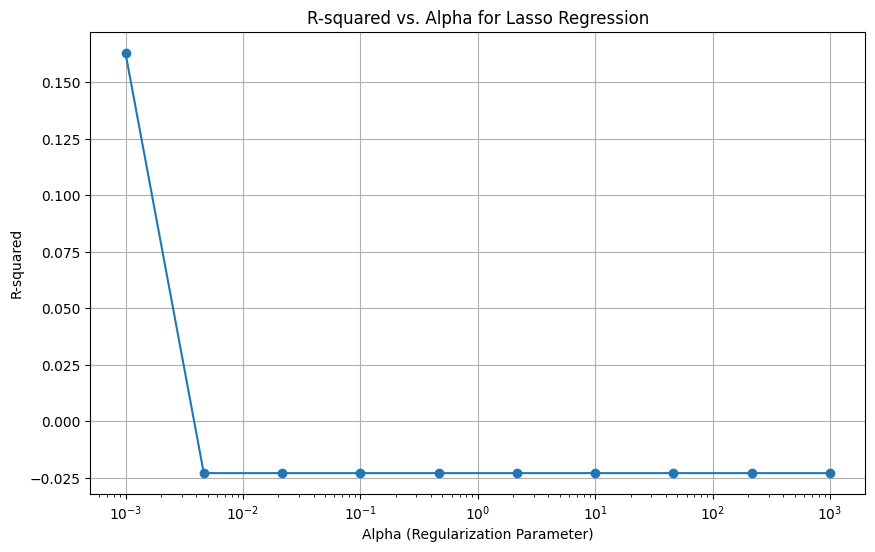

In [ ]:

# Extract alpha values and corresponding R-squared scores
alphas = list(alpha_r2_scores.keys())
r2_scores = list(alpha_r2_scores.values())

# Plot the R-squared scores against alpha values
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, r2_scores, marker='o')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('R-squared vs. Alpha for Lasso Regression')
plt.grid(True)
plt.show()



>> The flattening of graph shows that after a certain point shows that when alpha is sufficiently large , it will shrink some of coefficients estimates to 0. The model becomes extremely simple, with very few non-zero coefficients.

>>**4**\. **(2 Point)** *Which of the following two methods of Regularization worked better and why?*


>> Lasso worked better than Ridge Regularization considering the R squared values. This could be due a variety of reasons:
* Lasso performs feature selection by driving many feature coefficients to exactly zero. (useful when data has a lot of irrelevant features) and ignores them. Whereas Ridge , only shrinks the coefficients towards 0 but doesn't ignore them completely.
* Lasso is more efficient computationally than Ridge, when dealing with high dimensional data
* Benefits of feature selection and sparsity by Lasso were prominent even after absence of high collinearity


### **Part 3: Logistic Regression (5 Points)**

---


**1. (1 point)** Now let's consider logistic regression. What is the difference betweeen a linear and logistic regression problem? Explain. (You may take the example of the dataset and task used in this assignment to explain how it would look different for a logistic regression problem)

>>
* Linear regression is used for continuous target variables, meaning the output can take any numerical value within a given range.
* Logistic regression is used for binary classification problems, where the target variable has two possible outcomes, typically denoted as 0 and 1 (or "negative" and "positive"). Logistic regression models the probability that a given input belongs to a certain class.

Predicting whether a certain EEG pattern indicates a specific brain activity (e.g., a seizure), it would be a binary classification problem suitable for logistic regression. The predicted values would represent the probability of the EEG pattern belonging to the seizure class (1) or not (0).

But,  predicting the actual EEG measurement values based on various features, it would be a linear regression problem. The predicted values would be continuous and could take any real number.



**2. (1 point )** Following your answer in the previous question, convert the dataset such that for the same outcome prediction task, a logistic regression is suitable.

In [ ]:
# place your code here
threshold = 0.5  # Set an appropriate threshold based on your dataset

# Convert amplitude to binary labels (0 for no seizure, 1 for seizure)
Y_binary = (Y > threshold).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binary, test_size=0.2, random_state=42)

**3. (1 point)** Split this new dataset into training and testing with a 2:1 split. Implement logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the transformed dataset into training and testing sets (2:1 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binary, test_size=0.33, random_state=42)

# Assuming Y_train is a 2D array with shape (204, 85)
# Reshape to a 1D array by considering any seizure occurrence as 1 and no seizure as 0
Y_train_1d = (Y_train.sum(axis=1) > 0).astype(int)

# Now Y_train_1d should be a 1D array of binary labels (0 or 1)

# Create and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train_1d)

# Predict on the test data
Y_pred = logistic_model.predict(X_test)

# Ensure Y_test is a 1D binary array
Y_test_1d = (Y_test.sum(axis=1) > 0).astype(int)

# Calculate accuracy on the test data
accuracy = accuracy_score(Y_test_1d, Y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Print confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(Y_test_1d, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test_1d, Y_pred))


Accuracy: 0.8415841584158416
Confusion Matrix:
 [[85  1]
 [15  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91        86
           1       0.00      0.00      0.00        15

    accuracy                           0.84       101
   macro avg       0.42      0.49      0.46       101
weighted avg       0.72      0.84      0.78       101



**4. (2 point)** Report the performance of the model on the test data using accuracy. Also plot the confusion matrix and ROC-AUC curve. What can you infer from this confusion matrix? Also can you compare the logistic and linear regressions?

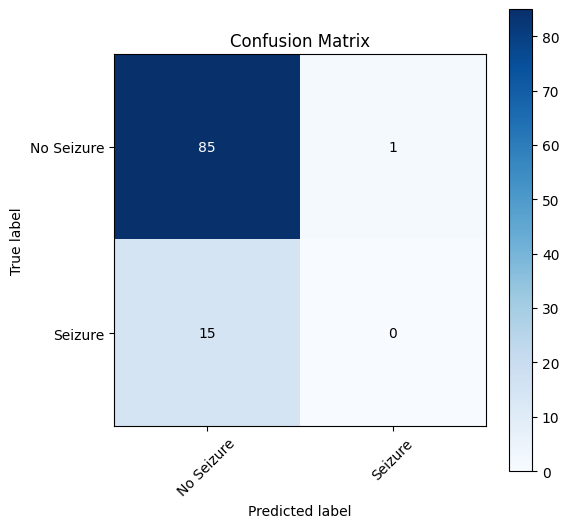

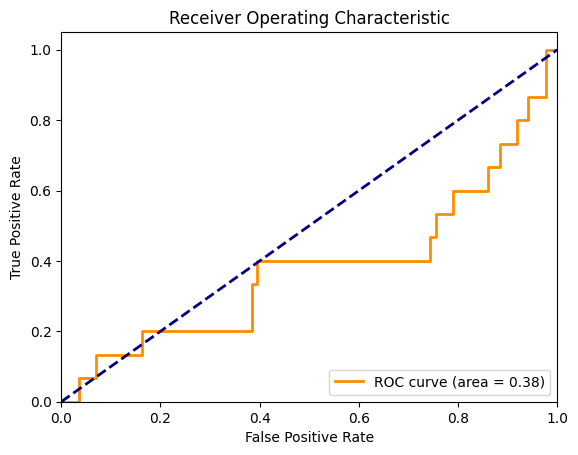

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curve
def plot_roc_curve(y_true, y_probs):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = roc_auc_score(y_true, y_probs)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(Y_test_1d, Y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Seizure', 'Seizure']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot ROC-AUC curve
# Assume Y_probs is the predicted probabilities of positive class
Y_probs = logistic_model.predict_proba(X_test)[:, 1]
plot_roc_curve(Y_test_1d, Y_probs)



>> Confusion matrix shows that it predicts true positive for most of the cases, thus the high accuracy.
Logistic regression is specifically suited for binary classification problems, aiming to model the probability of a sample belonging to a certain class.
Linear regression, on the other hand, is used for regression problems, predicting continuous numerical values.